accuracy score: 0.9309


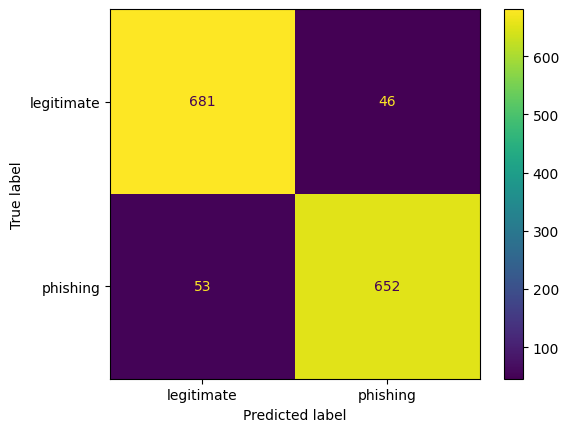

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import joblib
import pandas as pd

if __name__ == "__main__":
    data = pd.read_csv('../urlSet.csv', skiprows=range(2,10000,1), nrows=11431)

    x = data[['length_url', 'shortening_service', 'nb_at', 'nb_at',
              'https_token', 'nb_www', 'dns_record', 'web_traffic', 'google_index', 'nb_hyperlinks']]
    y = data['status']

    label = ['length_url', 'shortening_service', 'nb_at', 'nb_at',
             'https_token', 'nb_www', 'dns_record', 'web_traffic', 'google_index', 'nb_hyperlinks']

    model = joblib.load('../phishing-sites-detector.pkl')

    # accuracy
    predicted = model.predict(x)
    accuracy = accuracy_score(y, predicted)
    print(f'accuracy score: {accuracy:.4}')

    # confusion matrix
    predictions = model.predict(x)
    cm = confusion_matrix(y, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()